# Random Forest Classifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
The following steps were done to obtain the final classifier:
* Grid search to find best parameters
* Cross validation
* Parameter-CV accuary plotting

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import warnings
import src.Utils as utils
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
import sklearn.ensemble as ske

# environment settings
data_path = 'Data/'

#hack to avoid showing deprecationg warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 


# Deserialize previously saved data from "preprocessing"
with open(data_path+'train_pp.obj', 'rb') as train_pp, \
open(data_path+'test_pp.obj', 'rb') as test_pp:
    train_df = pickle.load(train_pp)
    test_df = pickle.load(test_pp)

## Train / test set splitting

In [11]:
#Separate training set from target variables
X,y = utils.train_test_separator(train_df)
#Create training set and test set with split 0.3
X_train , X_test ,y_train,y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)

## Grid search
Finds the best parameters

In [12]:
# # Grid search to find best parameter values
# param_grid = {'n_estimators':[10,20,50,100,500],'max_features':[5,6,7],'max_depth':[5,7,9]}
# grid_rf = GridSearchCV(ske.RandomForestClassifier(n_jobs=-1),param_grid=param_grid,cv=10,scoring='accuracy')
# grid_rf.fit(X,y)
# print(grid_rf.best_score_)
# print(grid_rf.best_params_)

## Cross validation & Testing
Using 10 fold strafied k-cross validation

In [13]:
#Kfold cross-validation with 10 folds
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X,y)

#Initialization of Random Forest Classifier
rf = ske.RandomForestClassifier(n_estimators=50,
                                max_features=6,
                                criterion='entropy',
                                max_depth=5,
                                bootstrap=True)

#Cross-validation score saved in scores array
scores= []
for k,(train,test) in enumerate(kfold):
    rf.fit(X[train], y[train])
    rf_train_score = rf.score(X[test],y[test])
    scores.append(rf_train_score)
print("\nCV accuracy : {} +/- {}".format(np.mean(scores),np.std(scores)))
rf.fit(X_train,y_train)
rf_test_score=rf.score(X_test,y_test)
print("Random Forest test accuracies {}".format(rf_test_score))


CV accuracy : 0.8361888548405402 +/- 0.035361150214486874
Random Forest test accuracies 0.8208955223880597


## Parameters vs Cross validation accuracy plots
Different plots that show how chaning the parameters affect the cross validation accuracy

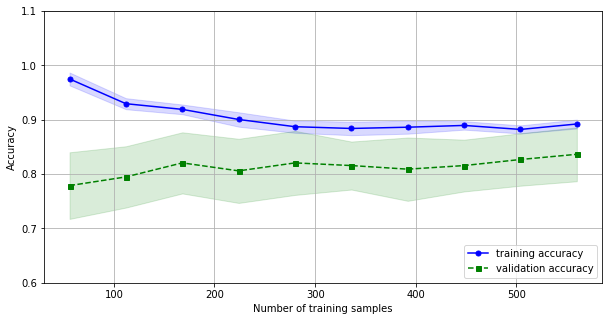

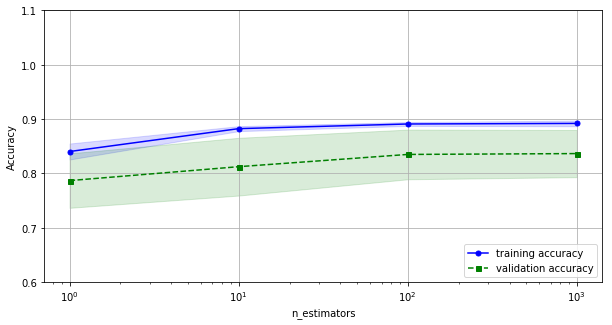

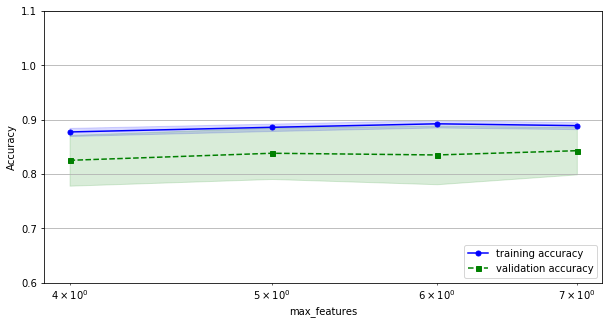

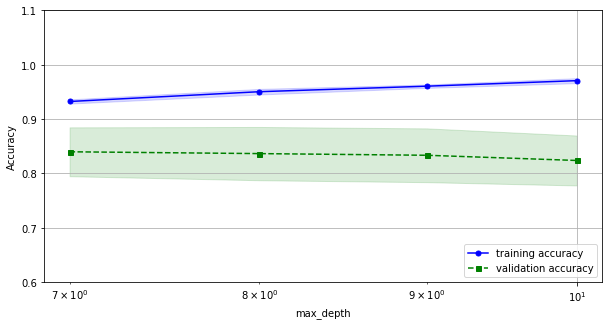

In [12]:
#Plotting graphs
plot_params = {
    'classifier': rf,
    'X_train': X_train,
    'y_train': y_train
}

utils.plot_cv_accuracy(**plot_params)
utils.plot_cv_parameters(**plot_params,
                        param='n_estimators',
                        param_range=[1,10,100,1000])
utils.plot_cv_parameters(**plot_params,
                         param='max_features',
                         param_range=[4,5,6,7])
utils.plot_cv_parameters(**plot_params,
                         param='max_depth',
                         param_range=[7,8,9,10])

#The graphs show grafically what the grid search found.

## Feature importance
Plot that shows which features where the most important in predicting the outcomes

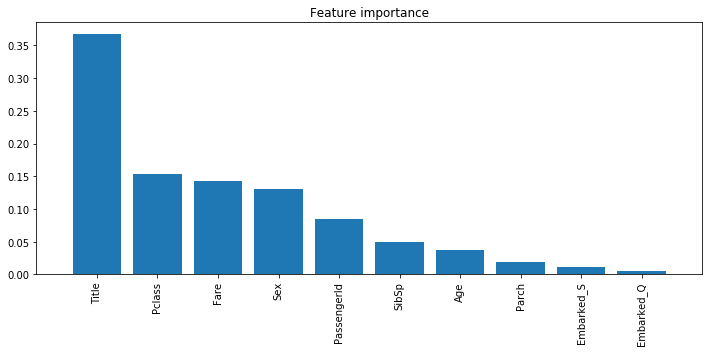

In [8]:
train_copytrain_co  = train_df.drop(['Survived'], axis=1)
feat_labels = train_copy.columns[0:]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(X.shape[1]):
#     print("%2d %-*s %f" %(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

plot_params = {
    'X': X_train,
    'importances': importances,
    'indices' : indices,
    'feat_labels':feat_labels[indices]
}
utils.plot_feature_importance(**plot_params)

## Saving the final output

In [9]:
#Prediction on real test set using random forest#Predict 
rf.fit(X,y)
survival_results =rf.predict(test_df)
result_df = pd.DataFrame(data={'PassengerId': test_df['PassengerId'].values,
                               'Survived': survival_results})
result_df['Survived'] = [0 if x == False else 1 for x in result_df['Survived']]
#Create output csv file
result_df.to_csv(data_path+"outputs/randomforest_ne_50_max_depth_5_max_features_6.csv", index=False)

In [7]:
#TODO :automatic file naming with param values , serialize output for ensamble learning, create plot for feature importancs